# <p style='background-color:lightgreen;font-family:Bahnschrift SemiBold;font-size:100%;text-align:center'>WINE QUALITY PREDICTION</p>

![](th.jpg)

#### Context
*The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).*

*These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).*

*This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality , I just shared it to kaggle for convenience. (If I am mistaken and the public license type disallowed me from doing so, I will take this down if requested.)*

#### Content     

For more information, read [Cortez et al., 2009].  

Input variables (based on physicochemical tests):   

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

 - Output variable (based on sensory data):

12 - quality (score between 0 and 10)

#### Tips    

*What might be an interesting thing to do, is aside from using regression modelling, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.*
*This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.
Without doing any kind of feature engineering or overfitting you should be able to get an AUC of .88 (without even using random forest algorithm)*

*KNIME is a great tool (GUI) that can be used for this.

1 - File Reader (for csv) to linear correlation node and to interactive histogram for basic EDA.

2- File Reader to 'Rule Engine Node' to turn the 10 point scale to dichtome variable (good wine and rest), the code to put in the rule engine is something like this:

$quality$ > 6.5 => "good"
TRUE => "bad"

3- Rule Engine Node output to input of Column Filter node to filter out your original 10point feature (this prevent leaking)

4- Column Filter Node output to input of Partitioning Node (your standard train/tes split, e.g. 75%/25%, choose 'random' or 'stratified')

5- Partitioning Node train data split output to input of Train data split to input Decision Tree Learner node and

6- Partitioning Node test data split output to input Decision Tree predictor Node

7- Decision Tree learner Node output to input Decision Tree Node input

8- Decision Tree output to input ROC Node.. (here you can evaluate your model base on AUC value)

#### Inspiration
Use machine learning to determine which physiochemical properties make a wine 'good'!

#### Acknowledgements     

*This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality , I just shared it to kaggle for convenience. (I am mistaken and the public license type disallowed me from doing so, I will take this down at first request. I am not the owner of this dataset.*

*Please include this citation if you plan to use this database: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

#### Relevant publication     

*P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

## <p style='background-color:silver;font-family:Bahnschrift SemiBold;font-size:100%;text-align:center'>CONTENTS</p>

* [1. Data Preprocessing](#1)
* [2. Data Visualizaton](#2)
* [3. Splitting of Dataset](#1)
* [4. Training our Model](#2)
    * [4.1 Support Vector Classification](#4.1)
    * [4.2 K-Nearest Neighbors](#4.2)
    * [4.3 Random Forest Classifier](#4.3)
    * [4.4 Logistic Regression](#4.4)
    
* [5. Grid Search CV and Randomized Search CV](#5)

In [3]:
# importing the packages
%matplotlib inline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<a id='1'></a>
## <p style="background-color:silver; font-family:newtimeroman; font-size:100%; text-align:center">1. Data Preprocessing</p>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# so we don't have any object type values , pretty good
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
#  we also don't have any null values


df['ID']=df.index

cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df=df[cols]
    

In [8]:
df.head(5)

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
from pandas_profiling import ProfileReport
ProfileReport(df,minimal=True)

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
df['alcohol'].shape

(1599,)

In [11]:
df['pH'].shape

(1599,)

<a id='2'></a>
## <p style="background-color:silver; font-family:newtimeroman; font-size:100%; text-align:center">2. Data Visualization</p>

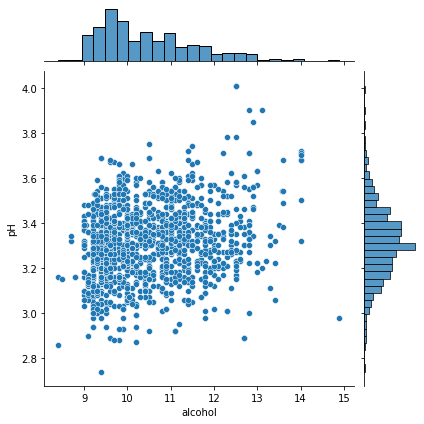

In [12]:
sns.jointplot(df['alcohol'],df['pH'])

<AxesSubplot:xlabel='alcohol', ylabel='pH'>

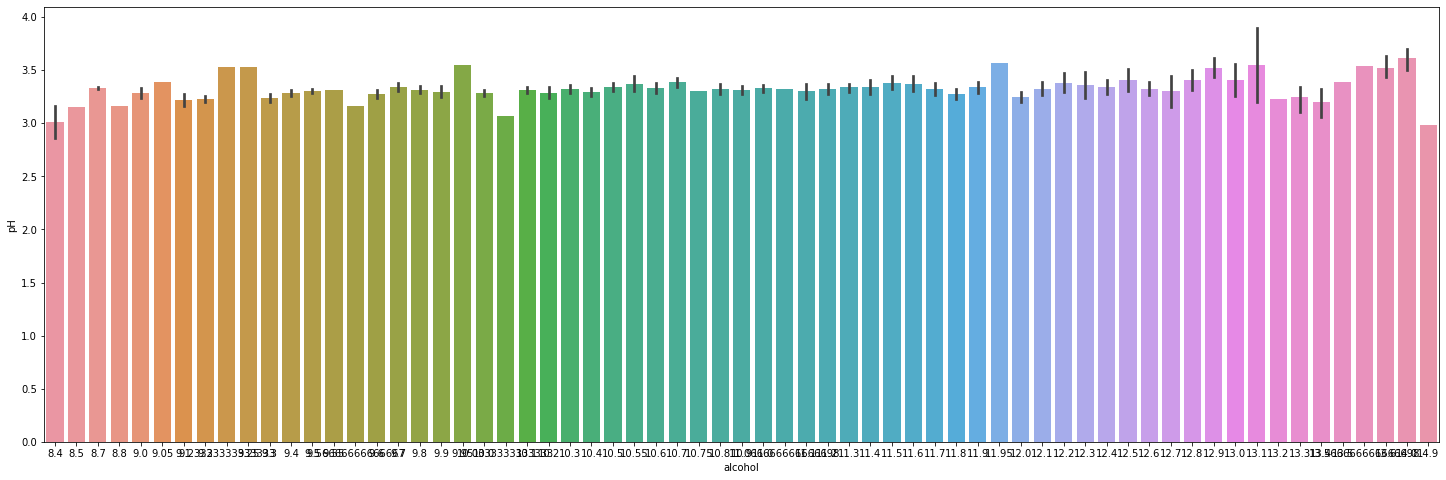

In [13]:
ax,fig=plt.subplots(figsize=(25,8))
sns.barplot(df['alcohol'],df['pH'])

<AxesSubplot:xlabel='pH', ylabel='count'>

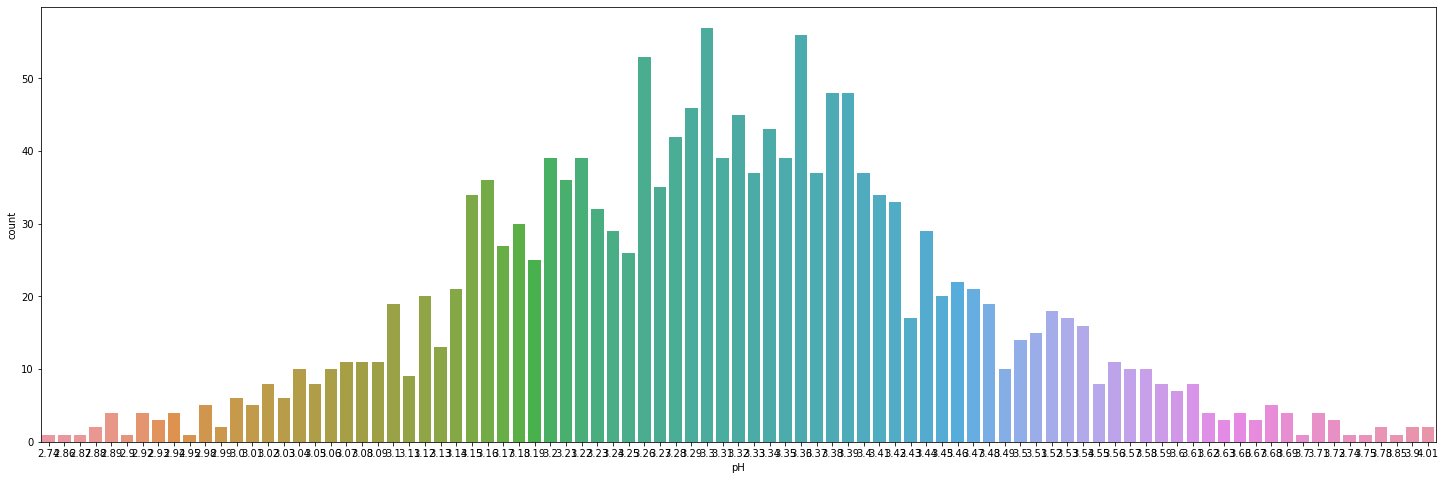

In [14]:
ax,fig=plt.subplots(figsize=(25,8))
sns.countplot(df['pH'])

<AxesSubplot:xlabel='quality', ylabel='count'>

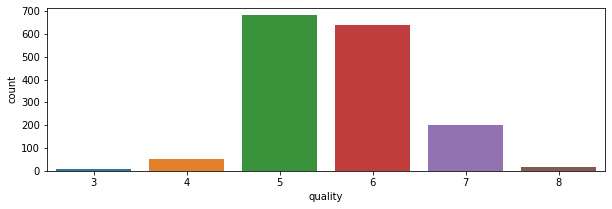

In [15]:
ax,fig=plt.subplots(figsize=(10,3))
sns.countplot(df['quality'])

In [16]:
df_copy=df.copy()

In [17]:
# dividing a column values by anygood and bad
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df_copy['quality'] = pd.cut(df_copy['quality'], bins = bins, labels = group_names)

In [18]:
df_copy.head()

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [19]:
df_copy['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [20]:
# now let's assign a labels to our quality varaibles
# 'bad' becomes 0 and 'good' becomes 1

good_bad={'good':1,'bad':0}
df_copy=df_copy.replace(good_bad)

In [21]:
df_copy.head()

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [22]:
df_copy['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

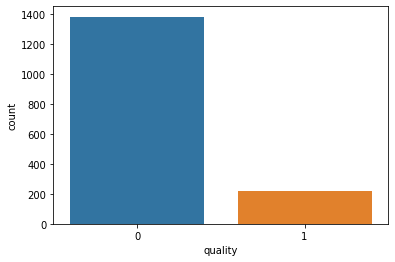

In [23]:
sns.countplot(df_copy['quality'])

In [ ]:
count=1
plt.subplots(figsize=(8,40))
for i in df.columns:
    plt.subplot(11,1,count)
    sns.barplot(x = 'quality', y = i, data = df)
    count+=1

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(9,5))       
corr=df.corr()
sns.heatmap(corr)

In [ ]:
sns.barplot(x=df_copy['citric acid'],y=df_copy['fixed acidity'])

<a id='3'></a>
## <p style="background-color:silver; font-family:newtimeroman; font-size:100%; text-align:center">3. Splitting of Dataset</p>

In [ ]:
y=df_copy['quality']
x=df_copy.drop('quality',axis=1)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

<a id='4'></a>
## <p style="background-color:silver; font-family:newtimeroman; font-size:100%; text-align:center">3. Training our Model</p>

#### Our training and testing data is ready now to perform machine learning algorithm

<a id='4.1'></a>
## <p style="background-color:silver; font-family:newtimeroman; font-size:80%; text-align:center">4.1. Support Vector Classification</p>

In [ ]:
from sklearn.svm import SVC
svc=SVC(random_state=42)
svc.fit(x_train,y_train)
predict_svc=svc.predict(x_test)
predict_svc_train=svc.predict(x_train)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

print('SUPPORT VECTOR CLASSIFICATION (CLASSIFICATION REPORT)')
print('----------------------------------------------------')
print('Training set metrics:')
print('Accuracy:', accuracy_score(y_train, predict_svc_train))
print('Precision:', precision_score(y_train, predict_svc_train))
print('Recall:', recall_score(y_train,predict_svc_train))

print('------------------------------')

print('Test set metrics:')
print('Accuracy:', accuracy_score(y_test, predict_svc))
print('Precision:', precision_score(y_test, predict_svc))
print('Recall:', recall_score(y_test, predict_svc))

*Clearly we have an algorithm that is `overfitting`. The accuracy on the test set is lower than the training set, but not too bad. Since we are dealing with an `imbalanced` dataset though, the precision and recall numbers are more important. And there is a huge difference in the `precision` and `recall` between the training and test sets.*    

*Let's try next model:*


<a id='4.2'></a>
## <p style="background-color:silver; font-family:newtimeroman; font-size:80%; text-align:center">4.2. K-Nearest Neighbors</p>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_jobs=-1)
knn.fit(x_train,y_train)
predict_knn=knn.predict(x_test)
predict_knn_train=knn.predict(x_train)


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

print('K-NEAREST NEIGHBORS (CLASSIFICATION REPORT)')
print('----------------------------------------------------')
print('Training set metrics:')
print('Accuracy:', accuracy_score(y_train, predict_knn_train))
print('Precision:', precision_score(y_train, predict_knn_train))
print('Recall:', recall_score(y_train,predict_knn_train))

print('------------------------------')

print('Test set metrics:')
print('Accuracy:', accuracy_score(y_test, predict_knn))
print('Precision:', precision_score(y_test, predict_knn))
print('Recall:', recall_score(y_test, predict_knn))

*We have an algorithm that is little `overfitting`, which is fine . The accuracy on the test set is lower than the training set, but not too bad. Since we are dealing with an `imbalanced` dataset though, the precision and recall numbers are more important. And there is a `slight` difference in the `precision` and `recall` between the training and test sets. But it is better than the Support Vector Classification model*    

*Let's try next model:*




<!-- Let us examine the top `feature importances` behind this model: -->

<a id='4.3'></a>
## <p style="background-color:silver; font-family:newtimeroman; font-size:80%; text-align:center">4.3. Random Forest Classifier</p>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)
rfc.fit(x_train,y_train)
predict_rfc=rfc.predict(x_test)
predict_rfc_train=rfc.predict(x_train)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

print('RANDOM FOREST CLASSIFICATION (CLASSIFICATION REPORT)')
print('----------------------------------------------------')
print('Training set metrics:')
print('Accuracy:', accuracy_score(y_train, predict_rfc_train))
print('Precision:', precision_score(y_train, predict_rfc_train))
print('Recall:', recall_score(y_train,predict_rfc_train))

print('------------------------------')

print('Test set metrics:')
print('Accuracy:', accuracy_score(y_test, predict_rfc))
print('Precision:', precision_score(y_test, predict_rfc))
print('Recall:', recall_score(y_test, predict_rfc))

*Let's try to see which features are impacting the most in our model results* 
### Feature Importance 

In [ ]:
# feature importance for random forest classifier

col_sorted_by_importance=rfc.feature_importances_.argsort()
feat_imp=pd.DataFrame({
    'columns':x.columns[col_sorted_by_importance],
    'feature importance':rfc.feature_importances_[col_sorted_by_importance]
})

import plotly.express as px
px.bar(feat_imp, x='columns', y='feature importance')

##### Let's try to increase our accuracy of models


<a id='5'></a>
## <p style="background-color:silver; font-family:newtimeroman; font-size:80%; text-align:center">5. Grid Search CV and Randomized Search CV </p>

In [ ]:
from sklearn.model_selection import GridSearchCV

grid={'n_neighbors':[5,7,9,11,15,21,25,31,41,51],
      'weights':['uniform', 'distance'],
      'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
      'metric':['euclidean','manhattan','chebyshev','minkowski']}
np.random.seed(42)

grid_knn=GridSearchCV(estimator=knn,
                      param_grid=grid,
                      cv=5,
                      verbose=2)
grid_knn.fit(x_train,y_train)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_jobs=-1)
# grid_knn.fit(x_train,y_train)
predict_knn_2=grid_knn.predict(x_test)
predict_knn_train_2=grid_knn.predict(x_train)


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

print('K-NEAREST NEIGHBORS (CLASSIFICATION REPORT)')
print('----------------------------------------------------')
print('Training set metrics:')
print('Accuracy:', accuracy_score(y_train, predict_knn_train_2))
print('Precision:', precision_score(y_train, predict_knn_train_2))
print('Recall:', recall_score(y_train,predict_knn_train_2))

print('------------------------------')

print('Test set metrics:')
print('Accuracy:', accuracy_score(y_test, predict_knn_2))
print('Precision:', precision_score(y_test, predict_knn_2))
print('Recall:', recall_score(y_test, predict_knn_2))

*Lets's  try  with  `Randomized Search CV`* :
### Randomized Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rs_grid={'n_neighbors':[5,7,9,11,15,21,25,31,41,51],
      'weights':['uniform', 'distance'],
      'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
      'metric':['euclidean','manhattan','chebyshev','minkowski']}
np.random.seed(42)

rs_grid_knn=RandomizedSearchCV(estimator=knn,
                         param_distributions=rs_grid,
                         n_iter=10,
                         cv=5,
                         verbose=1)
rs_grid_knn.fit(x_train,y_train)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_jobs=-1)
# rs_grid_knn.fit(x_train,y_train)
rs_predict_knn=rs_grid_knn.predict(x_test)
rs_predict_knn_train=rs_grid_knn.predict(x_train)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

print('K-NEAREST NEIGHBORS (CLASSIFICATION REPORT)')
print('----------------------------------------------------')
print('Training set metrics:')
print('Accuracy:', accuracy_score(y_train, rs_predict_knn_train))
print('Precision:', precision_score(y_train, rs_predict_knn_train))
print('Recall:', recall_score(y_train,rs_predict_knn_train))

print('------------------------------')

print('Test set metrics:')
print('Accuracy:', accuracy_score(y_test, rs_predict_knn))
print('Precision:', precision_score(y_test, rs_predict_knn))
print('Recall:', recall_score(y_test, rs_predict_knn))

##### Cross Validation Score for random forest and SGD

In [ ]:
#Now lets try to do some evaluation for random forest model using cross validation.
from sklearn.model_selection import cross_val_score
rfc_eval = cross_val_score(estimator = rfc, X = x_train, y = y_train, cv = 50)
rfc_eval.mean()

##### Random forest accuracy increases from `87 % to 91 %` using cross validation score


<a id='4.4'></a>
## <p style="background-color:silver; font-family:newtimeroman; font-size:80%; text-align:center">4.4.  Logistic Regression</p>

In [ ]:
from sklearn.linear_model import LogisticRegression
model_log_reg=LogisticRegression()
model_log_reg.fit(x_train,y_train)
model_log_reg.score(x_test,y_test)


In [ ]:
from sklearn.model_selection import GridSearchCV

grid={'penalty':['l1', 'l2', 'elasticnet', 'none'],
      'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
      
      'multi_class':['auto', 'ovr', 'multinomial']}
np.random.seed(42)

model_log_reg_grid=GridSearchCV(estimator=model_log_reg,
                      param_grid=grid,
                      cv=5,
                      verbose=1)
model_log_reg_grid.fit(x_train,y_train)


In [ ]:
model_log_reg_grid_test=model_log_reg_grid.predict(x_test)
model_log_reg_grid_train=model_log_reg_grid.predict(x_train)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

print('LOGISTIC REGRESSION (CLASSIFICATION REPORT)')
print('----------------------------------------------------')
print('Training set metrics:')
print('Accuracy:', accuracy_score(y_train, model_log_reg_grid_train))
print('Precision:', precision_score(y_train, model_log_reg_grid_train))
print('Recall:', recall_score(y_train,model_log_reg_grid_train))

print('------------------------------')

print('Test set metrics:')
print('Accuracy:', accuracy_score(y_test, model_log_reg_grid_test))
print('Precision:', precision_score(y_test, model_log_reg_grid_test))
print('Recall:', recall_score(y_test, model_log_reg_grid_test))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model_grad=GradientBoostingClassifier()
model_grad.fit(x_train,y_train)
model_grad.score(x_test,y_test)


In [ ]:
random_forest_classifier=rfc_eval.mean()
k_nearest_neighbor=grid_knn.score(x_test,y_test)
logistic_regression=model_log_reg.score(x_test,y_test)
support_vector_classifier=svc.score(x_test,y_test)
gradient_boosting_classifier=model_grad.score(x_test,y_test)



##### Thank for going through this notebook